In [121]:
# To supress Warning messages
import warnings 
warnings.filterwarnings('ignore')

# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns

In [123]:
# Read the csv File
df = pd.read_csv('iris.csv')
df.shape

(152, 6)

In [124]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [125]:
# Print the 10 random rows
df.sample(n = 10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
29,30,4.7,3.2,1.6,0.2,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
123,124,6.3,2.7,4.9,1.8,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor


In [126]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


## Data Pre-processing

### Question 2 - Check if there are any missing values



In [127]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

# Treat Missing Values

In [128]:
# Treat Missing values can be divided into two types. 
# 1. Remove rows of missing values
# 2. Impute values for missing values.
# Again, there are different ways of imputing values for missing ones. one of the way is to replace missing value with the 
# respective mean of corresponding feature.
df.fillna(df.mean(),inplace=True)

In [129]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
categorical_feature_mask = df.dtypes == object
print(categorical_feature_mask)
print(type(categorical_feature_mask))

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species           True
dtype: bool
<class 'pandas.core.series.Series'>


In [132]:
categorical_cols = list(df.columns[categorical_feature_mask])
print(categorical_cols)
print(type(categorical_cols))

['Species']
<class 'list'>


In [133]:
le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col : le.fit_transform(col))

df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
63,64,6.1,2.9,4.7,1.4,1
69,70,5.6,2.5,3.9,1.1,1
23,24,5.1,3.3,1.7,0.5,0
141,142,6.9,3.1,5.1,2.3,2
134,135,6.1,2.6,5.6,1.4,2
144,145,6.7,3.3,5.7,2.5,2
85,86,6.0,3.4,4.5,1.6,1
48,49,5.3,3.7,1.5,0.2,0
114,115,5.8,2.8,5.1,2.4,2
28,29,5.2,3.4,1.4,0.2,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [134]:
corr_matrix = df.corr()
corr_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.703344,-0.389905,0.865382,0.889288,0.942753
SepalLengthCm,0.703344,1.000000,-0.109368,0.871741,0.816256,0.775490
SepalWidthCm,-0.389905,-0.109368,1.000000,-0.420516,-0.355808,-0.415367
PetalLengthCm,0.865382,0.871741,-0.420516,1.000000,0.960771,0.939813
PetalWidthCm,0.889288,0.816256,-0.355808,0.960771,1.000000,0.951545
Species,0.942753,0.775490,-0.415367,0.939813,0.951545,1.000000


In [135]:
# No need to drop variables because the correlation range is not in -0.1 to 0.1

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [136]:
df.var()

# No Variables having almost zero variance.

Id               1938.000000
SepalLengthCm       0.676633
SepalWidthCm        0.185514
PetalLengthCm       3.071945
PetalWidthCm        0.577079
Species             0.675322
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

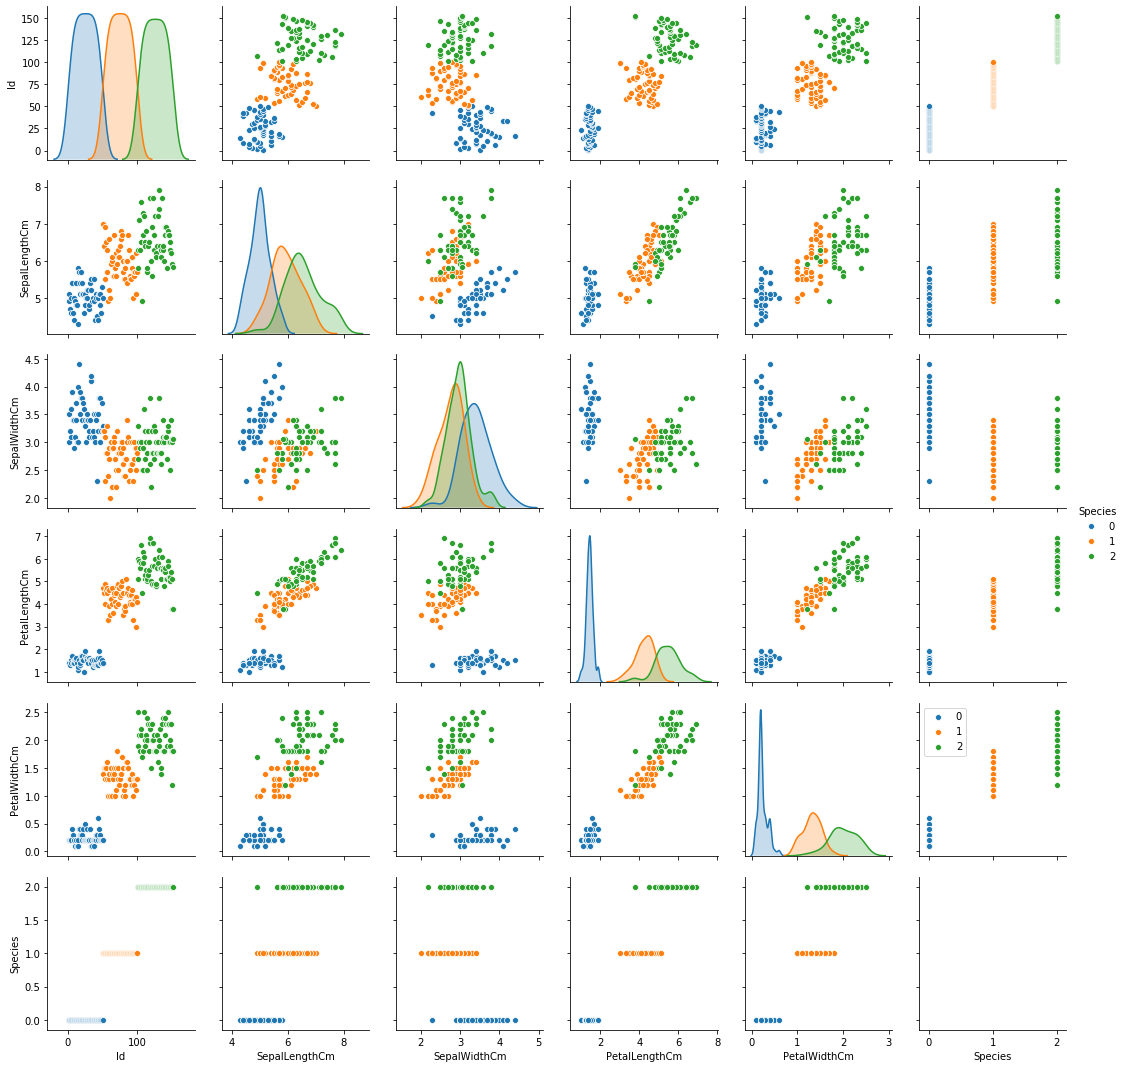

In [137]:
sns.pairplot(df,hue='Species',kind='scatter')
plt.legend()
plt.show()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [138]:
# Drop Id Column

iris_df = df.drop('Id',axis=1)

In [139]:
iris_df.shape

(152, 5)

In [140]:
# Create feature DataFrame
iris_feature_df = iris_df.drop('Species', axis=1)

In [141]:
iris_feature_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [142]:
iris_labels = df['Species']

In [143]:
X = np.array(iris_feature_df)
X.shape

(152, 4)

In [144]:
Y = np.array(iris_labels)
Y.shape

(152,)

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [146]:
# 3
NNH_3 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [147]:
NNH_3.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [148]:
p3_labels = NNH_3.predict(X_test)
NNH_3.score(X_test, Y_test)

1.0

In [149]:
# 5
NNH_5 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [150]:
NNH_5.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [151]:
p5_labels = NNH_5.predict(X_test)
NNH_5.score(X_test, Y_test)

1.0

In [152]:
# 9
NNH_9 = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )

In [153]:
NNH_9.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [154]:
p9_labels = NNH_9.predict(X_test)
NNH_9.score(X_test, Y_test)

1.0

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Misclassification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [155]:
scores = []
for i in range(1,21,2):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
    NNH.fit(X_train,Y_train)
    labels = NNH.predict(X_test)
    score= 1-NNH.score(X_test, Y_test)
    print('Misclassification Error for {} is {}'.format(i,score))
    scores.append(score)

Misclassification Error for 1 is 0.032258064516129004
Misclassification Error for 3 is 0.0
Misclassification Error for 5 is 0.0
Misclassification Error for 7 is 0.032258064516129004
Misclassification Error for 9 is 0.0
Misclassification Error for 11 is 0.0
Misclassification Error for 13 is 0.0
Misclassification Error for 15 is 0.0
Misclassification Error for 17 is 0.0
Misclassification Error for 19 is 0.0


## Plot accuracy

### Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

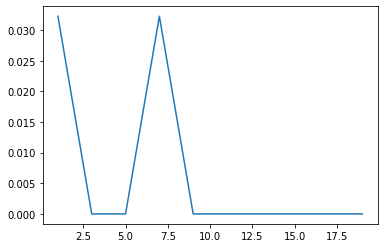

In [156]:
plt.plot(range(1,21,2),scores)
plt.show()